In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_metrics(csv_file):
    # Read the CSV file
    data = pd.read_csv(csv_file)
    
    methods = data['Method'].unique()  # Get unique methods
    metrics = ['MAP', 'MRR', 'Recall@1000', 'NDCG@3']

    # Generate a list of unique colors
    colors = plt.cm.viridis(np.linspace(0, 1, len(methods)))

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

    for i, metric in enumerate(metrics):
        row = i // 2  # Integer division to find the row index
        col = i % 2   # Modulus to find the column index
        
        for j, method in enumerate(methods):
            method_data = data[data['Method'] == method]
            axes[row, col].bar(j, method_data[metric], color=colors[j], label=method)  # Assign unique color to each method

        axes[row, col].set_title(metric)
        axes[row, col].set_ylabel(metric)
        axes[row, col].set_xticks(np.arange(len(methods)))
        axes[row, col].set_xticklabels(methods, rotation=30)

    plt.tight_layout()
    plt.show()

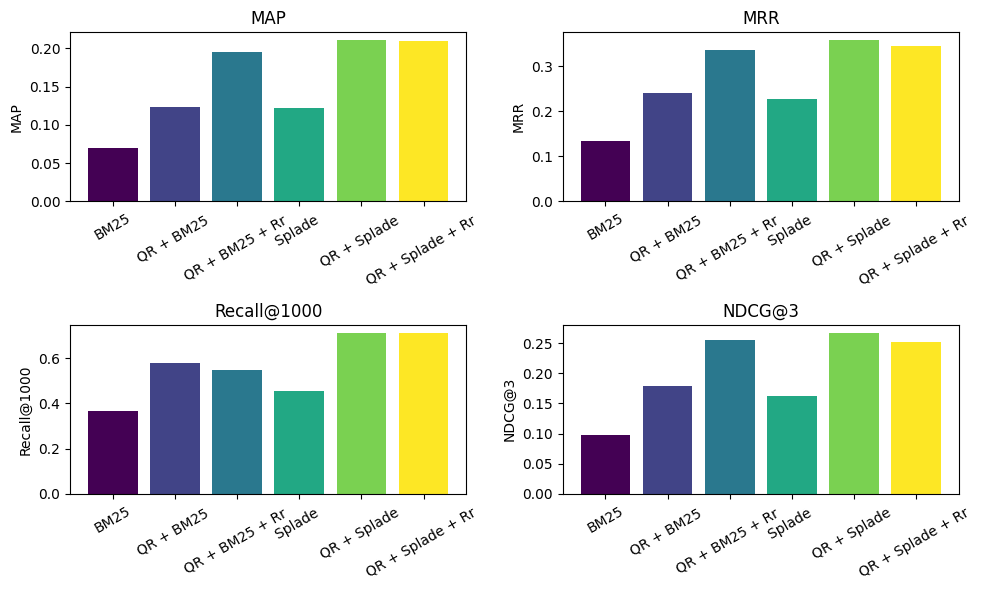

In [6]:
path_csv='scores.csv'
plot_metrics(path_csv)

In [7]:
def plot_recall_vs_others(csv_file):
    # Read the CSV file
    data = pd.read_csv(csv_file)

    methods = data['Method']
    other_metrics = ['MAP', 'MRR', 'NDCG@3']

    # Define different markers for each method
    markers = ['o', 's', '^', 'D', 'v', '*', 'X', 'P']
    if len(methods) > len(markers):
        raise ValueError("Not enough markers defined for the number of methods")

    # Create a 2x2 subplot grid
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    axes = axes.flatten() 

    for i, metric in enumerate(other_metrics):
        for j, method in enumerate(methods):
            axes[i].scatter(data[data['Method'] == method]['Recall@1000'], 
                            data[data['Method'] == method][metric], 
                            label=method, 
                            marker=markers[j])

        # Annotate each point with the method label
        for label, x, y in zip(methods, data['Recall@1000'], data[metric]):
            axes[i].annotate(label, (x, y))

        axes[i].set_xlabel('Recall@1000')
        axes[i].set_ylabel(metric)
        axes[i].set_title(f'Recall@1000 vs {metric}')
        if i == 0:  # Add legend only to the first plot for neatness
            axes[i].legend()

    # Hide the unused subplot (if any)
    for ax in axes[len(other_metrics):]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()


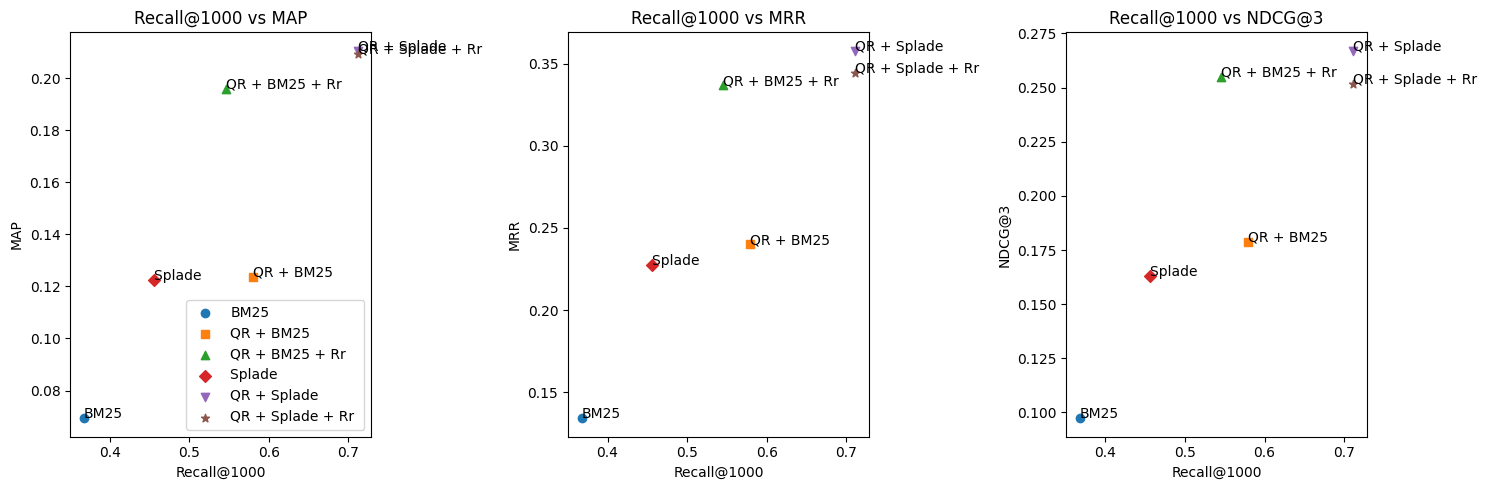

In [8]:
plot_recall_vs_others(path_csv)